# 1. Receptive field and parameter count (1 point)

Recall that the *receptive field* refers to size of the region in the input that are visible to a given activation (or neuron) in a convolutional neural network. "Visible" here means that the values of those inputs affect the value of the activation. In all of the following questions, assume that the input image is arbitrarily large, so you don't need to worry about boundary effects or padding.

1. Consider a convolutional network which consists of three convolutional layers, each with a filter size of 3x3, and a stride of 1x1. What is the receptive field size of one of the activations at the final output?
1. What is the receptive field if the stride is 2x3 at each layer?
1. What is the receptive field if the stride is 2x2 at each layer, and there is a 2x2 max-pooling layer with stride 2x2 after each convolutional layer?
1. Assume that the input image has 3 channels, the three convolutional layers have 16, 32, and 64 channels respectively, and that there are no biases on any of the layers. How many parameters does the network have?

### 1.1 
Denote the size of receptive field to be $D$. For the final output Layer $D = 1\times 1$. After second layer $D = 3\times 3$. After first layer $D = 5\times 5$. At the input layer $D = 7\times 7$.

### 1.2 
Denote the size of receptive field to be $D$. For the final output Layer $D = 1\times 1$. After second layer $D = 3\times 3$. After first layer $D = 7\times 9$. At the input layer $D = 15\times 27$.

### 1.3 
Denote the size of receptive field to be $D$. For the Final output (After the third pooling layer), $D= 1\times 1$. After the third conv layer, $D= 2\times 2$. After the second pooling layer, $D= 5\times 5$. After the second conv layer, $D= 10\times 10$. After the first pooling layer, $D= 21\times 21$. After the first conv layer, $D= 42\times 42$. At the input layer, $D= 85\times 85$.

### 1.4
Assume the filter size to be $3\times3$ and stride to be $1\times1$, then the first layer has the parameter $3\times 3\times3\times 16 = 432$. The second layer has the parameter $3\times 3\times 16\times 32 = 4608$. The third layer has the parameter $3\times 3\times 32\times 64 = 18432$. Thus, the final number of parameters are $432+4608+18432=23472$

# 2. CIFAR-10 classification (3 points)

CIFAR-10 is a standard dataset where the goal is to classify 32 x 32 images into one of 10 classes. The goal of this problem is simple: build and train a convolutional neural network to perform classification on CIFAR-10. The problem is intentionally extremely open-ended! There are dozens (hundreds?) of tutorials online describing how to train a convnet on CIFAR-10 - please seek them out and make use of them. Here are some resources to get you started (which include code for loading the dataset and evaluating performance on it):

- [CIFAR-10 example based on mxnet and our textbook](https://colab.research.google.com/github/d2l-ai/d2l-en-colab/blob/master/chapter_computer-vision/kaggle-cifar10.ipynb)
- [CIFAR-10 tutorial from PyTorch](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/cifar10_tutorial.ipynb)

You are welcome to use any other resource that you want (but please cite it!) - as I mentioned there are many, many tutorials online, and googling for help is an utterly crucial skill for a researcher! You will be graded on the final test accuracy achieved by your model:

- 60% accuracy or higher: 2/3 points
- 75% accuracy or higher: 3/3 points
- Highest accuracy in the class: 4/3 points!

Note that in order for us to know the final performance of your model, you will need to implement a function that computes the accuracy of your model on the test set (which appears in both of the linked tutorials above). The only rules are: You can only train your model on the CIFAR-10 training set (i.e. you can't use pre-trained models or other datasets for additional training, and you certaintly can't train on the CIFAR-10 test set!), and you must train the model on the free Colab GPU or TPU. This means you can only train the model for an hour or so! This is *much* less compute than is typically used for training CIFAR-10 models. As such, this is as much an exercise in building an accurate model as it is in building an efficient one. This is a popular game to play, and to the best of my knowledge the state-of-the-art is [this approach](https://myrtle.ai/learn/how-to-train-your-resnet/) which attains 96% accuracy in only *26 seconds* on a single GPU! (note that the final link on that page is broken; it should be [this](https://myrtle.ai/learn/how-to-train-your-resnet-8-bag-of-tricks/)).

There are lots of things you can try to make your model more accurate and/or more efficient:

1. Deeper models
1. Residual connections
1. [Data augmentation and normalization](https://d2l.ai/chapter_computer-vision/kaggle-cifar10.html#image-augmentation)
1. Regularization like dropout or weight decay
1. [Learning rate schedules](https://d2l.ai/chapter_optimization/lr-scheduler.html)
1. [Different forms of normalization](https://d2l.ai/chapter_convolutional-modern/batch-norm.html)

Note that we haven't covered all these topics in class yet, but you should be able to get to at least 60% accuracy without applying all of these ideas - and probably 75% by tweaking around a little bit. Specifically, you should be able to get about 60% accuracy by taking the basic AlexNet architecture we discussed in class and applying it directly to CIFAR-10. And, if you're feeling adventurous, feel free to go for 96% using the aforementioned blog series! Good luck!

In [ ]:
## Train CIFAR10 with PyTorch using ResNet.
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import argparse
#from utils import progress_bar

import multiprocessing as mp

## Model



In [ ]:
# ResNet Model

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out



class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


In [ ]:
# Set up trainning environment 
mp.set_start_method("fork")

#parser = argparse.ArgumentParser(description='PyTorch CIFAR10 Training')
#parser.add_argument('--lr', default=0.1, type=float, help='learning rate')
#parser.add_argument('--resume', '-r', action='store_true',
                    #help='resume from checkpoint')
#args = parser.parse_args()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch
losses = [] # losses every time for final learning curve


## Data

In [ ]:
# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# set up the model
print('==> Building model..')
net = ResNet18()
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

#if args.resume:
    # Load checkpoint.
    #print('==> Resuming from checkpoint..')
    #assert os.path.isdir('checkpoint'), 'Error: no checkpoint directory found!'
    #checkpoint = torch.load('./checkpoint/ckpt.pth')
    #net.load_state_dict(checkpoint['net'])
    #best_acc = checkpoint['acc']
    #start_epoch = checkpoint['epoch']

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

==> Building model..


## Training and Testing

In [ ]:
# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    global losses
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        if batch_idx == 390:
          losses.append(train_loss/(batch_idx+1))
          print('Loss: %.3f | Acc: %.3f%% (%d/%d)'
          % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))
          #progress_bar(batch_idx, len(trainloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                     #% (train_loss/(batch_idx+1), 100.*correct/total, correct, total))


def test(epoch):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

            if batch_idx == 99:
              print('Loss: %.3f | Acc: %.3f%% (%d/%d)'
              % (test_loss/(batch_idx+1), 100.*correct/total, correct, total))
              #progress_bar(batch_idx, len(testloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                         #% (test_loss/(batch_idx+1), 100.*correct/total, correct, total))

    # Save checkpoint.
    acc = 100.*correct/total
    if acc > best_acc:
        print('Saving..')
        state = {
            'net': net.state_dict(),
            'acc': acc,
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(state, './checkpoint/ckpt.pth')
        best_acc = acc

In [ ]:
for epoch in range(start_epoch, start_epoch+50):
    train(epoch)
    test(epoch)
    scheduler.step()


Epoch: 0
Loss: 1.968 | Acc: 31.054% (15527/50000)
Loss: 1.570 | Acc: 41.480% (4148/10000)
Saving..

Epoch: 1
Loss: 1.438 | Acc: 47.398% (23699/50000)
Loss: 1.308 | Acc: 52.520% (5252/10000)
Saving..

Epoch: 2
Loss: 1.172 | Acc: 57.768% (28884/50000)
Loss: 1.138 | Acc: 59.800% (5980/10000)
Saving..

Epoch: 3
Loss: 0.961 | Acc: 65.942% (32971/50000)
Loss: 0.965 | Acc: 66.750% (6675/10000)
Saving..

Epoch: 4
Loss: 0.788 | Acc: 72.432% (36216/50000)
Loss: 0.792 | Acc: 72.590% (7259/10000)
Saving..

Epoch: 5
Loss: 0.678 | Acc: 76.528% (38264/50000)
Loss: 0.646 | Acc: 77.670% (7767/10000)
Saving..

Epoch: 6
Loss: 0.603 | Acc: 78.968% (39484/50000)
Loss: 0.656 | Acc: 76.900% (7690/10000)

Epoch: 7
Loss: 0.566 | Acc: 80.448% (40224/50000)
Loss: 0.791 | Acc: 74.650% (7465/10000)

Epoch: 8
Loss: 0.539 | Acc: 81.490% (40745/50000)
Loss: 0.647 | Acc: 77.750% (7775/10000)
Saving..

Epoch: 9
Loss: 0.505 | Acc: 82.584% (41292/50000)
Loss: 0.569 | Acc: 80.690% (8069/10000)
Saving..

Epoch: 10
Loss: 0

## Result:
After 50 epochs of training, we have the testing accuracy to be 86.530%. 

Below is the the learning curve (Training loss vs Epoch). 

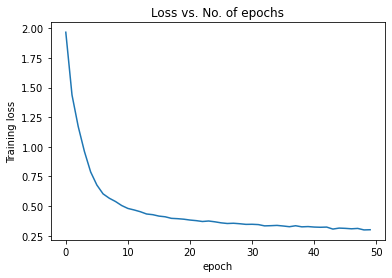

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('Training loss')
plt.title('Loss vs. No. of epochs')
plt.show()

## Acknowledgement
I collaberated with Yicheng Zou and Max (Yang) Hu to finish this assignment. 

The code to train ResNet on CIFAR 10 is adapted from GitHub: https://github.com/kuangliu/pytorch-cifar